# overview
1. 분류모델에대해 학습
    - 최대우도추정법
    - 교차 엔트로피 오차
    - 학습규칙(경사하강법)
2. 1차원 2클래스모델에서 2차원 2클래스 , 2차원 3클래스로 개념 확장


---
<!-- 머신러닝의 학습과정
1. 모델설정
2. 손실함수 설정
3. 학습방법 설정
4. 매개변수 갱신
5. 4번의 반복 -->

# CHAPTER 6 - 지도학습 : 분류


## 분류문제의 개념
<!-- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=je1206&logNo=220783024411

![image.png](attachment:image.png)
  -->
5장에서 다루었다.

<!-- ### 분류와 회기, 정량적 데이터와 정석적 데이터

클래스 : 의미없는 카테고리
 -->



# 6.1 1차원 입력 2클래스 분류

## 6.1.1 문제설정

0.4 ~ 0.8 크기를 가지는 암컷 0

0.8 ~ 1.6 크기를 가지는 수컷 1

T[n] = 크기데이터

X[n] = 성별데이터

In [77]:
# 리스트 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터 생성 --------------------------------
np.random.seed(seed=0) # 난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# 데이터 표시 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


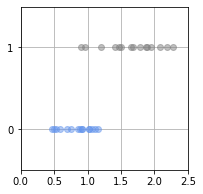

In [91]:
# 리스트 6-1-(2)
# 데이터 분포 표시 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o') # (B)
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])


# 메인 ------------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

## 6.1.2 확률로 나타내는 클래스 분류

## 2개의 class문제


<!-- ![image.png](attachment:image.png) -->
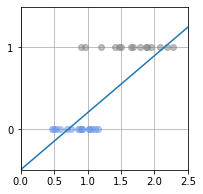
 
#### 선형회기를 분류모델에 사용할 시 문제점
 
- 선형회귀를 했을때 오차를 보면 확실하게 분류 할 수 있는부분(0보다 작거나 1보다 큰부분)에서 오차가 커진다.
 -  이 값들은 확률로 정의되기 때문에 이는 잘못된 결과를 가져온다.

- 2진분류된 출력을 내기가 어렵다

- 결정경계를 나누기 애매하다

-> 선형회귀로 하지말고 확률의 개념을 도입하여 문제를 살펴보자

## 확률을 사용하는 이유

1. 일반적으로 2개 이상의 Class를 가지게 되면 정성 출력 변수는 정량 변수로 변환되는 방법이 없다.
 - label을 정량변수로 변환하는 것은 불가능
 - 예측시 중간값의 의미가 불확실해진다


2. 현실의 데이터는 거의 불확실성을 가지고있기때문에 완벽하게 분류하는것은 불가능 하다.


3. 확률의 개념 도입하여 예측의 정확도를 높인다.

## 확률의 개념

확률(Probability)은 해당 사건(event) 이 일어날 가능성을 의미

- Frequentist probability (사전확률)

    - 해당 사건의 빈도수를 따져 그 사건이 발생할 가능성을 의미. 보통 실험적인 성향을 갖는 반복되는 시도를 통해 사건의 빈도수를 측정.
    
- Bayesian Probability (사후확률 )

    - 사건발생후(관측후)그것이 어떤 원인일 것이라고 기대되는 확률, 즉 결과로부터 원인이 무엇일까라는 역방향 확률(사전확률의 역확률)
    - likelihood에서 사후확률의 개념을 이용한다


---

> 어떤 사건 A 가 발생할 확률 P(A) 를 사전확률이라고 할 때, 사전 확률 P(A)가 발생했을때 사건 B 가 발생할 확률 P(B|A) 를 조건부 확률이라고 한다. 사후 확률은 순서를 바꿔서 사건 B가 발생했을 때 사건 A가 발생했을 확률 P(A|B)를 말한다.
>
>ex) 우산과 비의 확률
<!-- 
입력변수 $x_n$ (데이터)

목표변수$t_n$ (클레스, 카테고리, 라벨 <-분류문제의 경우)
 -->

<!-- ### 선형회귀 -> 확률(조건부확률)
0.8g ~ 1.2g사이일경우 전혀 예측할 수없다? x
-> 확률로서 예측가능 -->

## 조건부확률 
#### 조건부 확률의 개념
- 어떤 사건이 일어난 조건이 있을 경우 다른 사건이 일어날 확률

>정보량의 관점에서 보면?
>- 어떤 사건이 일어날 확률을 구하는 과정에서 또 다른 사건을 단서로서 제공

> 뒤에 cross entropy설명할때 정보량의 개념을 다룬다. 여기서는 개념적으로만 이해하면 된다.

#### 조건부 확률의 수식적 표현 
$$P=(Y|X)$$
관심사는 B이고 그 단서로 A를 고려한다는 의미이다.


조건부 확률은 계단형 그래프로표시된다

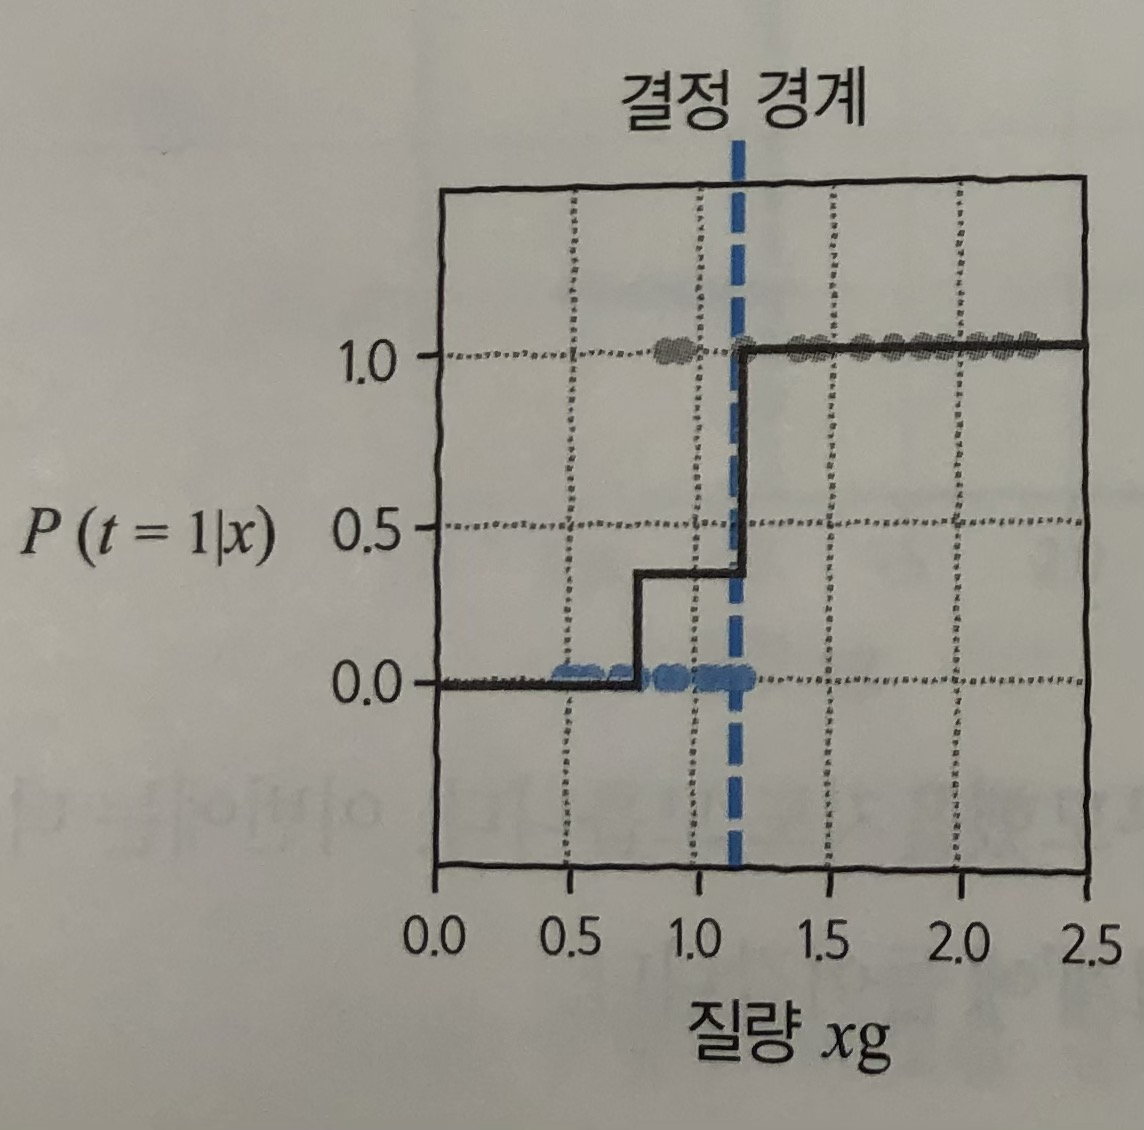

---

>추가적으로
 데이터 쌍 X,Y는 사건(event)이고 조건부확률 
$P=(Y|X)$ 의 X,Y
 는 확률 변수이다
  따라서 데이터 X,Y를 바로 확률변수 X,Y 로 취급해서 넣으시면 잘못된 표현이다. 개념상 확률분포는 사건(event)이 아닌 매핑된 수치 를 입력값으로 받아들인다. 따라서
$$P=(Y=y|X=x)$$
로 표현하는것이 맞는표현이다.


---



#### 결정경계의 문제
확률로 표현하는것이 선형회기에 비해 더 좋지만 결정경계의 설정이 필요해 보인다.
- 조건부확률의 결정경계는 끊어져있어서 좋지않은 결정경계이다. (일반적으로 부드러운 결정경계가 선호된다.)
- -> 확률변수에서 표집한값들을 토대로 그 확률변수의 모수를 구하여 결정경계를 찾아보는 방법을 사용한다.

## 6.1.3 최대가능도

가능도 =likelihood = 우도

## 최대가능도법 개념적 이해

- 어떤 확률변수에서 표집한 값들을 토대로 그 확률변수의 모수를 구하는 방법.
- 가정한 확률 분포에다가 주어진 관측값을 넣었을 때 나오는 확률값 

#### 사용의 이유
데이터의 확률 분포를 알고 있다면, 우리는 해당 분포에 확률 변수를 넣어 바로 확률을 계산할 수 있다.

현실에서는 데이터가 매우 많고 또 데이터 차원이 높은 경우가 많기때문에 확률 분포를 알아내는 것이 쉽지가 않다. 

(현실에서는 관측 값(데이터)만 주어지고 확률 분포를 알아내야 하는 경우가 대부분이다)
#### 분포의 가정
- 데이터의 확률 분포가가 무엇인지 알 수 없기 때문에 특정 확률 분포를 미리 가정 하고 시작하는것이다.

- ex) 5장의 기저함수 : 가우시안 분포, -exp(-x)함수 ...

#### +


Parameter는 확률분포를 구성하는 변수들이며 θ로 표기한다.

θ 는 언제든 바뀔 수 있는 ‘변수’ 이기때문에 이 θ 가 어떤 값을 갖는지에 따라 해당 확률 분포의 모양이 결정이 된다.
- 예를 들어 가우시안 분포라면 평균과 분산이 θ가된다
- 예를 들어 y= ax+b의 분포를 따른다고 가정하면 θ는 a,b

---

#### likelihood와 확률의 개념 비교

Likelihood와 확률 두 개념 모두 확률 분포의 결과값이지만, 둘은 같은 개념이 아니다.

둘을 비교해보면
- 가설 로 세워진 확률 분포에 대해서 관측값을 넣어서 나온 결과값은 Likelihood 이고, 
- 반대로 실제 고정된 확률 분포에 관측값을 넣었을 때 나온 결과값이 확률 이다. 

즉, Likelihood 는 언제든 θ 가 바뀌면 관측값은 고정이어도 결과값이 다르게 나올 수 있다. (Likelihood 는 θ 에 대한 확률 이다)

-> θ_hypothesis 가 실제 확률분포의 θ_real 와 얼마나 가까운지로 해석 될 수있다.

<!-- Likelihood 개념을 들여다보면 사실 주 관심사는 θ 라고 할 수 있다. -->


> 가정한 확률분포를 실제 확률분포와 비슷하게 만들기위해 관측한 데이터들이 잘 표현되도록 θ 를 조절해보자. (데이터를 잘 표현하기위해 )    
> -> 확률 분포를 추정하는 방법 중에서 최대우도추정법(MLE, Maximum Likelihood Estimation)을 사용한다.

---

#### 최대우도추정법 (Maximum Likelihood Estimation)
MLE 는 각 관측값에 대한 총 가능도(모든 가능도의 곱)가 최대가 되는 분포를 찾는 추정법이다.
- 가정한 분포를 이루는 θ 를 업데이트 해가면서 분포를 움직인다.
- 계속해서 움직이다 보면 분명 Likelihood 가 제일 큰 부분에 이르게 된다.

---

#### 딥러닝에서는 어떻게 작동하는가?

딥러닝모델은 가설을 세우고 그 가설이 최대화되는 θ 를 찾도록 역전파(Backpropagation) 방식으로 θ 를 업데이트 한다. 

따라서 확률론적인 관점으로 보면 MLE 를 통해 θ 를 업데이트해서 확률 모델을 최대화하는 것이다.


<!-- 이제 우리는 ‘실제 확률 분포는 모르지만 분명 뭔가 있을 거다’ 라고 확신 을 갖고 임의의 확률 분포를 가정하기로 약속했습니다. 
그러면 어떻게 가정을 해야 되는 걸 까요?  -->


<!-- 다행히 그냥 유명한 확률 분포들을 선택해서 가정해도 충분합니다. (서로의 확률이 독립적이라고 가정??)
이산 확률 분포로는 푸아송 분포, 이항 분포, 베르누이 분포 등이 있고 연속확률분포는 유명한 가우시안 분포(Gaussian Distribution) 있습니다. 가우시안 분포는 정규 분포(Normal Distribution) 라고도 합니다. -->

<!-- 이 예시는 실제 확률분포를 가우시안 분포로 가정한것 -->


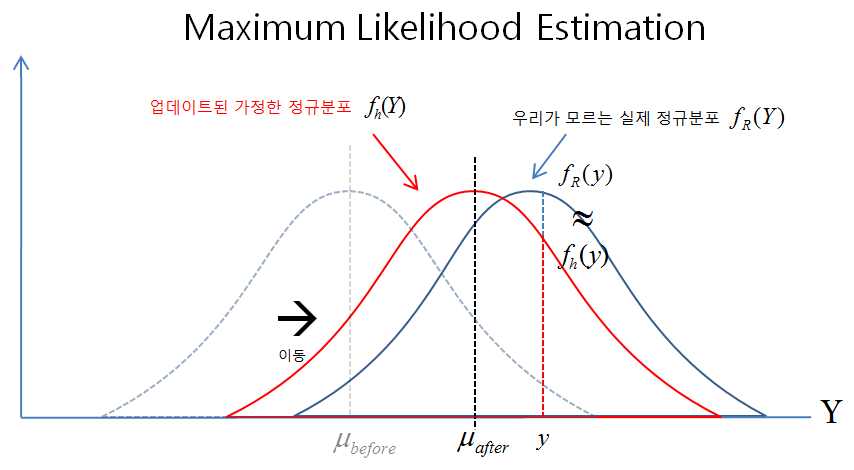

##### θ를 추정하는법 ( 실제 확률분포를 가우시안 분포라고 가정하였다 ) (hypothesis - sigmoid , softmax ...)

위 그림의 μ 의 변화에 따라 정규 분포의 위치가 바뀌게 되면 Likelihood 도 높아지게 된다.

이렇게 높아지도록 계속해서 이동하게 되면 언젠가는 Likelihood 가 실제 확률 분포의 확률값과 비슷해지게 된다.

하지만 실제 분포가 어떻게 되는지 알 수가 없기 때문에 사실 y 에 대한 확률값을 구할 수가 없다. 

따라서 관측값에 대한 Likelihood 가 어떤 값이 되어야 되는지 모르지만 Likelihood 가 최대가 되는 경우는 우리가 알 수 있다.

정규 분포 특성상 μ 에 대한 Likelihood 가 제일 높기 때문에 μ 가 최대한 관측값들과 가까운 위치에 놓이면 되는 것이다.
- 여기서는 평균 μ 만 언듭하였지만, 실제로는 평균과 표준편차가 모두 고려되어야 한다


##### 실제 분류모델의 출력이 나오는 추론과정 ( 분류문제에서 분포의 추정 )

1. 분류모델은 P(Y∣X) 라는 확률 분포를 알아내야 한다.


2. 그러나 실제 확률 분포를 알 수 없기 때문에 정규분포라고 가정한다.


3. 여기서 우리가 알아야 하는 것은 정규분포를 이루는 θ 이다. 
 - X (가정한 데이터(분포)) 가 주어졌을 때 Y (실제값 데이터(분포)) 에 대한 확률 분포의 최적의 θ 를 알아내는 것 
 - X = f(θ)



4. 딥러닝에서는 역전파(Backpropagation) 을 통해서 더 이상의 변화가 없을 때까지 θ 를 업데이트한다. 이것을 Maximum Likelihood Estimation 으로 해석하는 것이다.

<!-- 

근데 궁금한 것이 생겼습니다. 
확률 분포가P(Y) 가 아니라 P(Y∣X) 라면 어떤 모양을 이루게 되는 걸까요?
조건부확률의 경우에는 확률 분포는 조건부확률분포(Condtional Distribution) 라고 합니다. 
관심사인 확률변수 Y 에 대한 확률 분포는 주어진 단서인 또 다른 확률변수 X 까지 고려해서 확률 분포를 이루게 됩니다.
고려해야 하는 확률 변수가 많아지게 된다면 확률 분포 또한 앞에선 본 것처럼 단순한 2차원 평면으로 표현하기가 힘들어집니다. 
아래는 이해를 돕기 위한 자료입니다.

![image-4.png](attachment:image-4.png)

 -->

---


#### 확률 분포를 알아내 후 딥러닝에서 결과값을 도출하여 라벨Y와 비교하는 과정 (확률론적 관점)

1. 딥러닝에선 hidden layer 있는 Weight 와 Bias 가 입력값과 연산되어서 결과값을 내어 해당 라벨과 비교한다.

 - 확률론적 관점에선 weight와 bias는 확률 변수 값으로 해석 될 수 있다.(전체 parameter를 θ로 표현)
 

2. 우리가 가정한 확률분포는 X 를 고려한 Y에 대한 분포이고, 그 다음 MLE 를 통해 θ 를 업데이트 해준다.

 - 목적하는 θ 는 확률 분포를 구성하는 변수이지만, 가장 높은 확률을 갖는 확률 변수이다. 

 - 따라서 θ 를 관심사로 둔 확률 변수 Y 와 동일선상에 놓고 다룰 수 있다. 
 

3. 구해낸 θ 와 Y를 적합한 Loss function 을 이용해 계산하면 얼마나 차이나는 알 수 있다.


4. 제대로 학습이 되었다면 그 확률 분포의 θ 는 알고자 하는 해당 라벨 y 와 같은 값을 내보내게 될 것이다.

 - (이 예시에서 정규 분포로 가정하였으니 θ는 μ 와 σ 이다)
-> 결론 :θ를 알아내어 가정한 분포(값)를 구하고, 실제 데이터 분포(값) Y 를 lossfunction으로 비교하면 가정한 분포(값)와 실제 분포(값)의 오차를 알 수 있다 


>θ 를 관심사로 두게 되면 우리는$P(Y∣X)=P_θ(Y∣X)$라고 다시 표현할 수 있습니다. 달라진 부분은 크게 없고 말하는 의미가 조금 달라졌을 뿐입니다. 
$P_θ(Y∣X)$ 을 해석을 하자면 X 가 주어졌을 때 Y 가 나올 경우를 최대화 하는 θ 를 찾을 거다 라고 이해하면 됩니다.
딥러닝 논문들을 읽다보면 $P_θ(Y∣X)$ 의 표현도 자주 나오기 때문에 마무리 하기 전에 잠시 짚어보았습니다.
>
> 출처 - https://devkihyun.github.io/study/Machine-learining-and-Probability/

---


## 최대가능도법 수식적 이해
<!-- https://process-mining.tistory.com/93 -->


### likelihood

#### 최대가능도의 수식적 의미
Q : X=(1,1,1,1) 이라는 데이터가 어느 분포를 따를확률이 더 높을까?

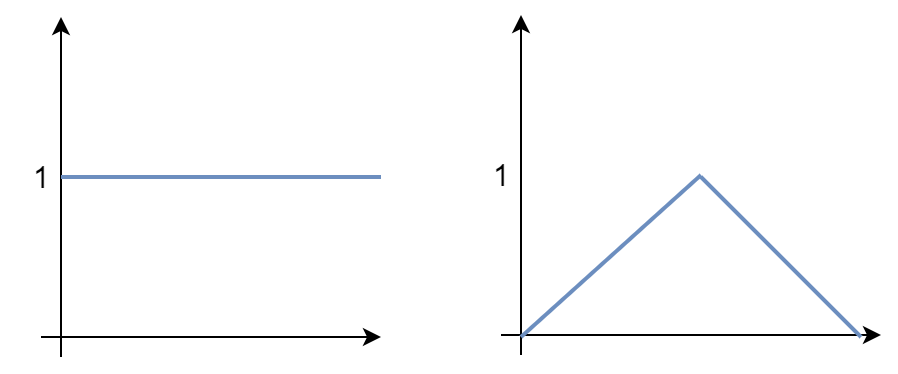



특정 분포로부터 만들어졌을 확률
- $L(\theta) = p(X|\theta)$

모든 데이터들이 독립적이라고 가정하면
- $L(\theta) = p(X|\theta) = \prod_{n=1}^N p(x_n|\theta)$ 

### log likelihood ( negative log likelihood )

 데이터 X가 θ의 parameter를 가지는 분포를 따르려면 이 likelihood가 최대가 되는 분포를 찾아야한다.
 
 최대값을 구하기위해 미분을 해야하지만 식이 곱셈으로 연결되어있으 바로 미분을 연산하기 쉽지 않다.
 - log를 붙혀 미분연산을 이용하여 최댓값을 구할 수 있도록 한다
$$E(\theta) = -log L(\theta)= - \sum_{n=1}^N log p(x_n|\theta)$$


> #### -,log를 취하는 이유
> - \-  : log likelihood가 최소화할때 오차가 최소가 되도록 하기위해..+
> - log : log안의 곱셈을 덧셈으로 바꾸어 연산할 수 있도록 하기위해..+
<!-- > log를 취한 가능도를 로그 가능도라고 부른다.
>- 평균제곱오차함수 대신 사용되는 확률세계의 목적함수

>\+ 어디에 쓰이는지, 평균제곱오차함수와 로그가능도의 비교 (각각 최소화하는 매개변수, 최대화하는매개변수를 찾는다)

>최대인 매개변수를 구하는 법 -->


### maximum likelihood 



likelihood를 최대화 하는 값

계산
- log likelihood를 최소화하는 (likelihood를 최대화하는) θ 값을 찾기위해 log likelihood 식을 각각의 θ에대해 편미분하고, 이 식이 0이 되는 값(극솟값)을 찾는다.

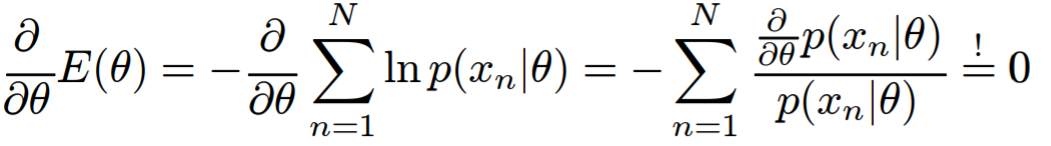

### maximum likelihood estimate
likelihood를 최대화하는 parameter 값을 찾는것을 maximum likelihood estimate라고 한다
- 어떤 모수가 주어졌을 때 원하는 값들이 나올 가능도를 최대로 만드는 모수를 선택하는 방법

본질적으로 딥러닝의 손실함 수인 Cross Entropy를 최소화 하는 파라미터를 찾는 과정과 같다.

만약 가정하는 확률 분포가 가우시안 분포일때 NLL은 MSE(Mean Square Error)와도 같게 된다. 

<!-- 추가적으로 maximum likelihood는 분산을 실제보다 작게 추정하여 표본에 대하여 overfitting될 수도 있다는 한계점도 지닌다.  -->


## 6.1.4 로지스틱 회귀 모델  

<!-- https://www.youtube.com/watch?v=rNn7mVF6HWo&list=PL9mhQYIlKEheuxhyGbUIpKR1EFM-o0Br1&index=3
https://process-mining.tistory.com/93 -->

### 로지스틱회귀모델이 사용되는 이유

지금까지는 데이터를 균일한 분포에서 생성된 것(변환 전)과 가우스 분포에서 생성된것(가우스기저함수)을 살펴보았다.

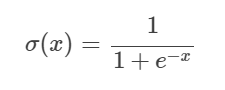
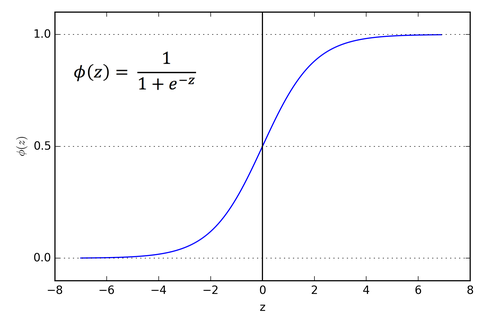


#### 로지스틱 회귀모델 특징
- 선형함수를 시그모이드 함수의 안에 넣은것
- 직선모델의 큰 양의 출력은 1 에가까운 값이되고 절댓값이 큰 음의 출력은 0에 가까운 값으로 변환되에 직선의 함수는 0과 1의 범위에들어간다

-> 분류모델을 확률적으로 설명하는데 타당하다

---
|  |binary classification | multinoinal classification |
|:-----|------:|-----:|
|hypothesis | sigmoid | softmax|
|사용용도|주로 중간 층의 활성화 함수|주로 출력함수|
|cost|binary cross entropy|cross entropy|


---

sigmoid함수와 softmax함수의 비교

- 4 장에서 다루었음

cost 함수비교

- 

y = 8x -10

In [41]:
# 리스트 6-1-(3) 함수 정의
def logistic(x, w):
    y = 1 / (1 + np.exp(-(w[0] * x + w[1])))
    return y

1.25

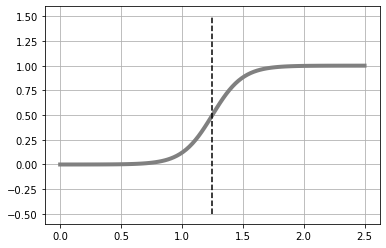

In [42]:
# 리스트 6-1-(4) 
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 결정 경계
    i = np.min(np.where(y > 0.5)) # (A)
    B = (xb[i - 1] + xb[i]) / 2 # (B)
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    return B


# test  y = 8x -10
W = [8, -10]
show_logistic(W)

직선이 0 의 값을 갖는 점의 값  =  sigmoid의 중간이 되는 값

0.5를 더해주어야 시그모이드의 중심을 지난다

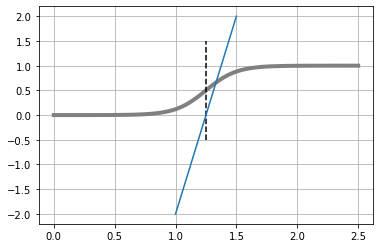

In [43]:
%matplotlib inline

# test  y = 8x -10
W = [8, -10]
show_logistic(W)

x = np.linspace(1,1.5,10)
y = 8*x -10

plt.plot(x,y)

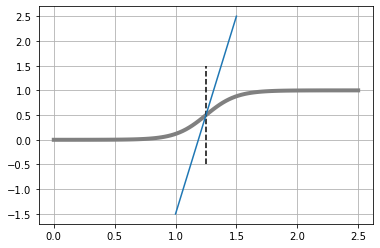

In [44]:
%matplotlib inline

# test  y = 8x -10
W = [8, -10]
show_logistic(W)

x = np.linspace(1,1.5,10)
y = 8*x -10 + 0.5

plt.plot(x,y)

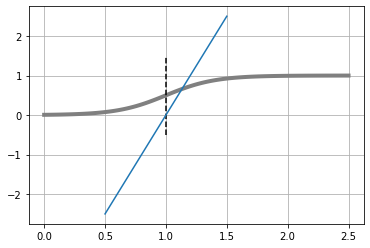

In [45]:
%matplotlib inline

# test  y = 8x -10
W = [5, -5]
show_logistic(W)

x = np.linspace(0.5,1.5,10)
y = 5*x -5

plt.plot(x,y)

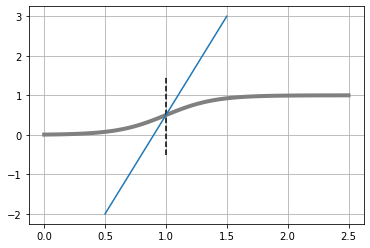

In [46]:
%matplotlib inline

# test  y = 8x -10
W = [5, -5]
show_logistic(W)

x = np.linspace(0.5,1.5,10)
y = 5*x -5 +0.5

plt.plot(x,y)

## 6.1.5 교차 엔트로피 오차

## 개념정리
### 정보량

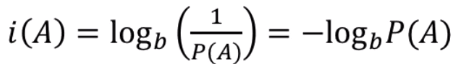
- 확률이 낮은 사건일수록 값어치있는 정보(내포하고 있는 정보가 많다)라는 의미이다.
- 정보이론에서, 놀람의 정도를 말한다.
- negative log likelihood와 동일한 모양
    - negative log likelihood는 정보량으로 해석 될 수 있다

<!--     - ex) 누구화 대화를 나누었나? -->

#### 정보량 수식의 이해
> #### 정보량의 특성
>- 정보량은 항상 0보다 크다
>- 항상 발생하는 사건의 정보량은 0이다
>- 자주일어나는 사건일수록 정보량은 0에 가깝다
>- 독립적인 사건들의 정보량 합은 각 사건의 합이어야 한다

> 위의 성질들은 모두 로그의 성질이 만족한다

---
## cross-entropy


### 엔트로피
#### 엔트로피의 개념

정의 : 확률변수의 불확실성을 수치로 나타낸것(어떤 상태의 불확실성)이다.

이해 : 기댓값 = SUM( 확률 x 특정값(정보량) )



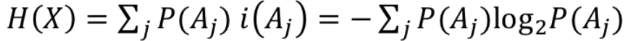

- 사건 A를 반복실행했을때, 얻을 수 있는 '평균정보량', 어떤 사건에 대한 정보량의 기댓값

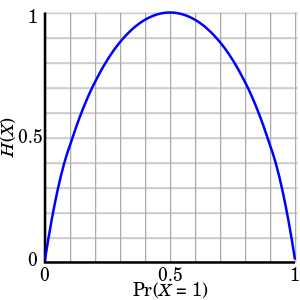
    
> 
>  예측하기 어려운 사건일수록 정보량이 많아지고 엔트로피도 커지게 된다
> - ex)엔트로피가 0 일때 = 출력이 확실한 상태

> 출력에대해 아무 정보가 없을때 최고값을 가진다
> - ex) 동전의 앞 뒤가 나올 확률이 각각 1/2, 1/2일때 1로 최고값을 가진다 

---


### cross-entropy의 개념
P에 대한 확률분포 Q가 있을 때, Q가 P와 얼마나 비슷한지를 나타내는 의미가 있다.

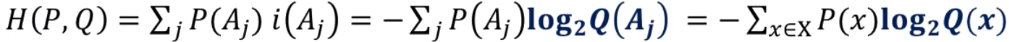

---

### cross-entropy와 likelihood와의 관계
negative log likelihood는 
$$L(\theta) = - \sum_{n=1}^N log P(x_n|\theta)$$
이고
negative log likelihood의 기댓값은
$$E(L(\theta)) = - \sum_{n=1}^N P(x_n)log P(x_n|\theta)$$

cross entropy CE(p,q)에서 

- p(x) = 우리가 가진 데이터의  실제 분포 P(x)

- q(x) = 분포 θ의 조건하에서 관측값X가 등장할 확률 P(x|θ), 

라고 한다면 식은 다음과 같이 바뀐다. 

$$CE(P,Q)= - \sum_{n=1}^N p(x_n)logq(x_n|θ)$$


> #### 결론
>
>우도의 곱(우도 * 확률값)이 최대인 모델을 찾는 것,
>
>=
>
>로그우도의 기댓값이 최대인 모델을 찾는 것,
>
>=
>
>학습데이터의 분포와 모델이 예측한 결과의 분포 사이의 차이인 크로스엔트로피를 최소화 하는 것,
>
>위의 process들은 서로동치이다


> 기댓값이 0 과 1 일경우 likelihood와 동일한 식을 보인다


---




### 분류와 cross-entropy

#### 오체제곱법과 cross-entropy의 차이

- 오차제곱법은 값의 흩어진 정도를 사용하지만 교차엔트로피 오차는 정답레이블에서 정답에 해당하는 위치의 확률의 로그값이 출력된다


- 교차엔트로피 오차는 특정 클래스에 속할 정보량을 이용한다


- 교차엔트로피 오차 역시 정보량이 0에 가까워져 발생확률이 1에 가깝게 만드는것을 목적으로 한다



- cross-entropy가 더빠르다..???
 - 정답의 기댓값이 1, 아닐때가 0 이면 0인부분을 계산하지 않아도 된다
 - 이 경우 negative log likelihood와 식이 동일해진다 
 
 


\+ cross-entropy의 함수구현시 x=0에서 -무한대로 발산하기때문에 확률이 0인 값에는 0 대신 매우 작은값을 넣어준다


#### 이진분류와 다항분류 비교 (확장)

데이터에 맞는 오차를 결정해야된다 (지금의 데이터는 확률로 표현됨) -> 교차엔트로피


|  |binary classification | multinoinal classification |
|:-----|------:|-----:|
|hypothesis | sigmoid | softmax|
|cost|binary cross entropy|cross entropy|
|cost 수식 | $$-ylog(H(x))-(1-y)log(1-H(x))$$ |  $$- \sum_x P(x)lnQ(x)$$|



#### binary cross entropy
input
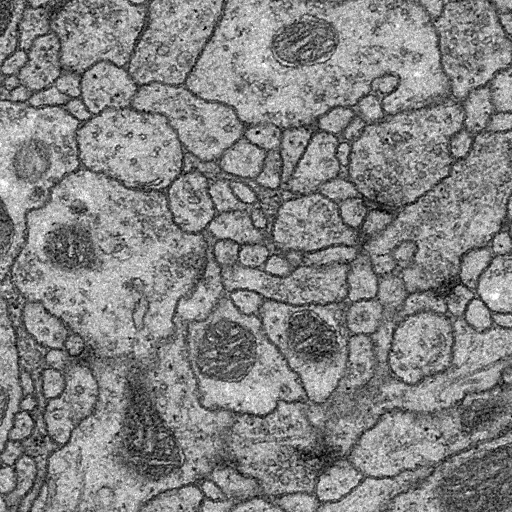
label
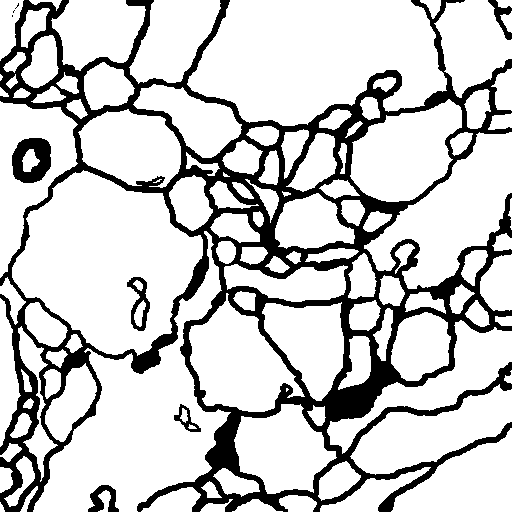
output
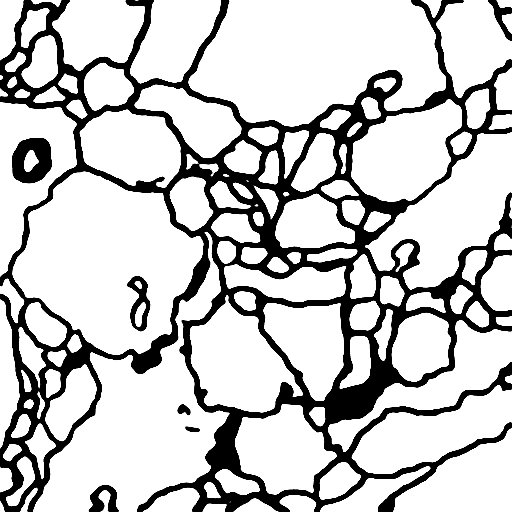
#### cross entropy
input
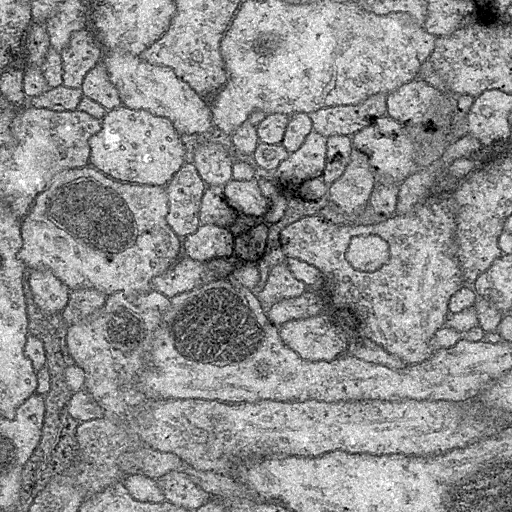
label
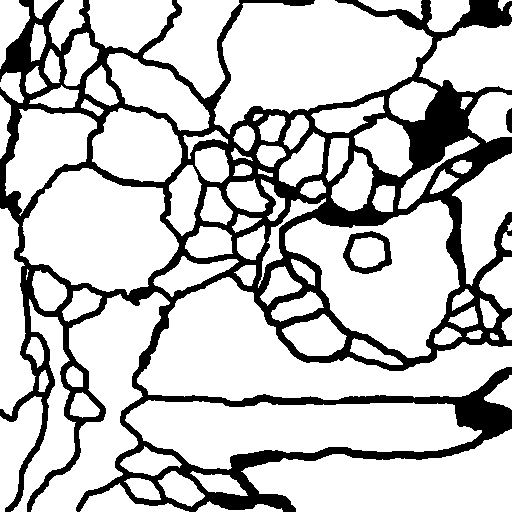
output
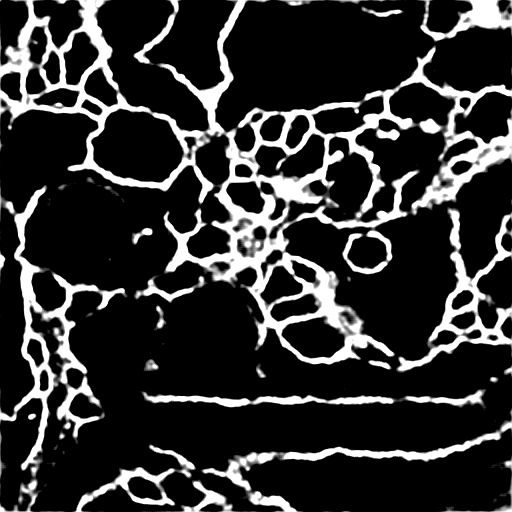


---

### KL-Divergence

KL = crossentropy  -  entropy

https://blog.naver.com/vkfkd327/222140888715

KL-Divergence와 cross entropy 무얼사용하든 큰 상관 없다

<!-- ---

---
https://icim.nims.re.kr/post/easyMath/550
https://velog.io/@hojp7874/%EA%B5%90%EC%B0%A8-%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC

---

crossentropy설명
https://www.youtube.com/watch?v=uMYhthKw1PU
https://ramees.tistory.com/64
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=infoefficien&logNo=221149189323
https://gooopy.tistory.com/63

---
likelihood와 crossentropy의 관계
https://blog.naver.com/llkg1596/222545063552 -->

# _ after

Information: 주어진 임의의 이벤트에서 발생하는 놀라움의 양

Entropy: 주어진 임의의 이벤트에서 발생한 Information들의 기대값

KL divergence: 두 확률 분포 P, Q가 있을 때, P 분포를 근사하는 Q 분포를 통해 샘플링할 때 발생하는 정보량의 손실

Cross entropy: 두 확률 분포 P, Q 사이의 차이를 측정하는 지표

<!-- 손실함수로 쓰일때 KL divergence와 Cross entropy의 약간의 의미차이가 발생한다 -->


In [47]:
# 리스트 6-1-(5)
# 평균 교차 엔트로피 오차 ---------------------
def cee_logistic(w, x, t):
    y = logistic(x, w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee


# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

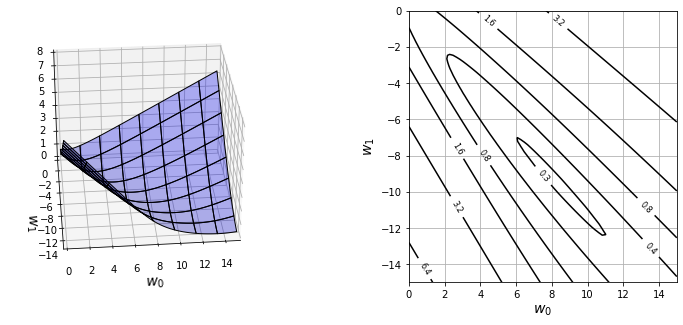

In [48]:
# 리스트 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D


# 계산 --------------------------------------
xn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
x0 = np.linspace(w_range[0, 0], w_range[0, 1], xn)
x1 = np.linspace(w_range[1, 0], w_range[1, 1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
C = np.zeros((len(x1), len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0] = x0[i0]
        w[1] = x1[i1]
        C[i1, i0] = cee_logistic(w, X, T)


# 표시 --------------------------------------
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -95)


plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, C, 20, colors='black',
                   levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

최솟값을 가지는 형태이다

## 6.1.6 학습 규칙의 도출

#### 경사 하강법을 사용하기위해 매개변수를 편미분

#### 연쇄 법칙의 사용
$$ dh/dw_n = = dh/d\sigma_n * d\sigma_n/dy_n * dy_n/dw_n $$
- (1) : $dy_n/dw_n$
- (2) : $d\sigma_n/dy_n$
- (3) : $dh/d\sigma_n$
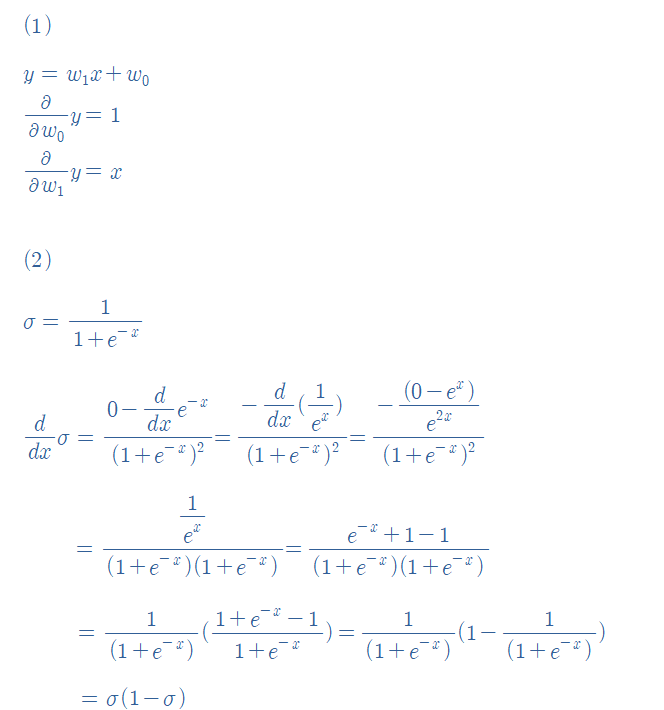
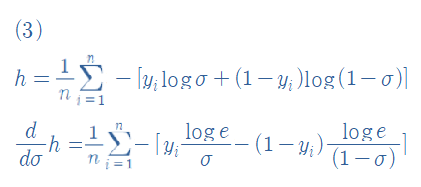

In [49]:
# 리스트 6-1-(7)
# 평균 교차 엔트로피 오차의 미분 --------------
def dcee_logistic(w, x, t):
    y = logistic(x, w)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n]) * x[n]
        dcee[1] = dcee[1] + (y[n] - t[n])
    dcee = dcee / X_n
    return dcee


# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

## 6.1.7 경사 하강법에 의한 해

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


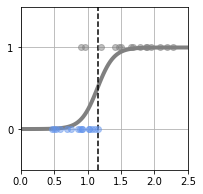

In [50]:
# 리스트 6-1-(8)
from scipy.optimize import minimize


# 매개 변수 검색
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t),
                    jac=dcee_logistic, method="CG") # (A)
    return res1.x


# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

# 6.2 2차원 입력 2클래스 분류

## 6.2.1 문제 설정

In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [52]:
# 리스트 6-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# 데이터 생성 --------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]
T2[:, 1] = T3[:, 1] | T3[:, 2]

In [53]:
# 리스트 6-2-(2)
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [54]:
# 리스트 6-2-(3)
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [55]:
# 리스트 6-2-(4)
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


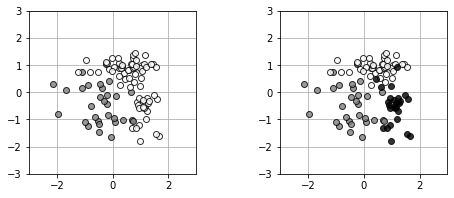

In [56]:
# 리스트 6-2-(5)
# 데이터 표시 --------------------------
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],
                 linestyle='none', markeredgecolor='black',
                 marker='o', color=c[k], alpha=0.8)
        plt.grid(True)


# 메인 ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)


plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

## 6.2.2 로지스틱 회귀모델

함수의 변화

In [57]:
# 리스트 6-2-(6)
# 로지스틱 회귀 모델 -----------------
def logistic2(x0, x1, w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2])))
    return y

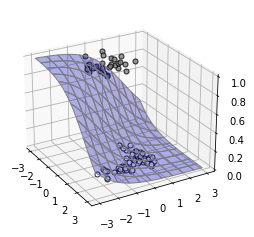

In [58]:
# 리스트 6-2-(7)
# 모델 3D보기 ------------------------------
from mpl_toolkits.mplot3d import axes3d


def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)


def show_data2_3d(ax, x, t):
    c = [[.5, .5, .5], [1, 1, 1]]
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    Ax.view_init(elev=25, azim=-30)


# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

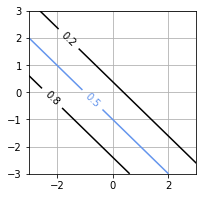

In [74]:
# 리스트 6-2-(8)
# 모델 등고선 2D 표시 ------------------------


def show_contour_logistic2(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=10)
    plt.grid(True)


# test ---
plt.figure(figsize=(3,3))
W=[-1, -1, -1]
show_contour_logistic2(W)

In [60]:
# 리스트 6-2-(9)
# 크로스 엔트로피 오차 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n, 0] * np.log(y[n]) +
                     (1 - t[n, 0]) * np.log(1 - y[n]))
    cee = cee / X_n
    return cee

In [61]:
# 리스트 6-2-(10)
# 크로스 엔트로피 오차의 미분 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0] = dcee[0] + (y[n] - t[n, 0]) * x[n, 0]
        dcee[1] = dcee[1] + (y[n] - t[n, 0]) * x[n, 1]
        dcee[2] = dcee[2] + (y[n] - t[n, 0])
    dcee = dcee / X_n
    return dcee


# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([ 0.10272008,  0.04450983, -0.06307245])

w0 = -3.70, w1 = -2.54, w2 = -0.28
CEE = 0.22


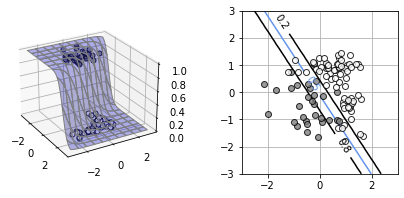

In [62]:
# 리스트 6-2-(11)
from scipy.optimize import minimize


# 로지스틱 회귀 모델의 매개 변수 검색 -
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x


# 메인 ------------------------------------
plt.figure(1, figsize=(7, 3))
plt.subplots_adjust(wspace=0.5)


Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)


show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))


Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

# 6.3 2차원 입력 3클래스 분류

## 6.3.1 3클래스 분류 로지스틱 회귀 모델

In [63]:
# 리스트 6-2-(12)
# 3 클래스 용 로지스틱 회귀 모델 -----------------


def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    y = np.zeros((n, K))
    for k in range(K):
        y[:, k] = np.exp(w[k, 0] * x0 + w[k, 1] * x1 + w[k, 2])
    wk = np.sum(y, axis=1)
    wk = y.T / wk
    y = wk.T
    return y


# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:3, 0], X[:3, 1], W)
print(np.round(y, 3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


## 6.3.2 교차 엔트로피 오차

소프트멕스 사용

In [64]:
# 리스트 6-2-(13)
# 교차 엔트로피 오차 ------------
def cee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    cee = 0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee - (t[n, k] * np.log(y[n, k]))
    cee = cee / X_n
    return cee


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

3.9824582404787288

## 6.3.3 경사 하강법에 의한 해

In [65]:
# 리스트 6-2-(14)
# 교차 엔트로피 오차의 미분 ------------
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = logistic3(x[:, 0], x[:, 1], w)
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = dcee[k, :] - (t[n, k] - y[n, k])* np.r_[x[n, :], 1]
    dcee = dcee / X_n
    return dcee.reshape(-1)


# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)


array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [66]:
# 리스트 6-2-(15)
# 매개 변수 검색 -----------------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

In [67]:
# 리스트 6-2-(16)
# 모델 등고선 2D 표시 --------------------
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)


    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        wk = logistic3(xx0[:, i], xx1[:, i], w)
        for j in range(3):
            y[:, i, j] = wk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


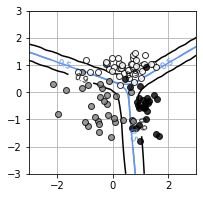

In [68]:
# 리스트 6-2-(17)
# 메인 ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))


plt.figure(figsize=(3, 3))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()